# Zadanie 1

## Wczytywanie potrzebnych bibliotek  

In [35]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

## Ustawianie globalnych danych 

### Ustawiam tutaj, dane które są uniwersalne, dla każdego testu, to znaczy:
1. Liczba stopni swobody 
2. Liczba danych  
3. Liczba symulacji, które wykonam 
4. Poziom istnotności

In [36]:

np.random.seed(seed=123)

# Zakres stopni swobody, jakie zaprezentuję na wykresie
stopnie_swobody = range(1,50,1) # Zakres od 1-50 co 1
# Ustalam poziom istotności 
poziom_istotnosci = 0.05
# Liczba danych dla jakich wykonam symulacje 
liczby_danych = [10,20,50,100,200]
# Liczba symulacji na jakich będę bazować 
liczba_symulacji = 100



## Funckja ogólna symulacji

### Uniwersalna funkcja, która będzie służyła do symulacjii mocy danego testu. W ten sposób zapisu dalsza część będzie dużo czytelniejsza. Jedyną zmienną będzie "test", która w środku symulacji wybierze, któru dokładnie test jest teraz symulowany.

C:\Users\Arkadiusz Studia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


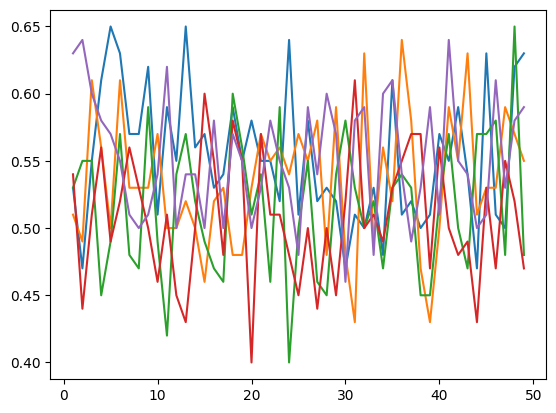

In [38]:
def symulacja_testu(test):
    # Tablica, która zbierze mi moce testów
    moce_testow = []

    # Zaczynamy symulacje 
    # Dla każdej liczby danych
    for l_danych in liczby_danych:
        # Tworzę nową tablicę która będzie przechowywała
        # moce testu dla n-tej liczby danych
        moce_n_testu = []
        # Dla każdego stopnia swobody
        for stopien_s in stopnie_swobody:
            # W tej zmiennej będę sumował liczbę razy, gdy dla danego zestawu
            # danych odrzuciłem hipotezę zerową
            suma_odrzucenia_H0 = 0
            # Symulacja, dla danego zestawu danych
            for k in range(liczba_symulacji):
                # Tworzę próbkę danych z rozkładu t-Studenta
                # o l_danych wielkości i stopien_s stopni swobody
                probka = stats.t.rvs(stopien_s,size=l_danych)
                # Standaryzacja danych
                stand_probka = (probka-np.mean(probka))/np.std(probka)

                # Tutaj jest moment decyzyjny, gdzie decyduje jaki test
                # jest teraz symulowany

                # Test Chi-kwadrat 
                if test == "chi":
                    # Jeżeli pvalue z danego testu jest mniejsze niż wczesniej
                    # ustalony poziom istotnotnosci to odrucamy Hipoteze zerowa
                    # co znaczy ze zwiekszamy zmienna sumujaca odrzucenie H0 o 1
                    if stats.chisquare(stand_probka).pvalue < poziom_istotnosci:
                        suma_odrzucenia_H0 += 1
                
                # Test Shapiro-Wilka 
                elif test == "shapiro":
                    if stats.shapiro(stand_probka).pvalue < poziom_istotnosci:
                        suma_odrzucenia_H0 += 1 
                
                # Test Kołgomorova 
                elif test == "kolmog":
                    if stats.kstest(stand_probka).pvalue < poziom_istotnosci:
                        suma_odrzucenia_H0 +=1 
            
            # Teraz podliczamy odsetek w jakim odrzucilismy H0 w całej symulacji
            moce_n_testu.append((suma_odrzucenia_H0/liczba_symulacji))
        # Teraz dodajemy moce n-tego testu do głownej tablicy przechowującej moce testu
        moce_testow.append(moce_n_testu)

    # Symulacja zakonczona

    return moce_testow
            

sym = symulacja_testu("shapiro")
plt.figure()
for moce in sym:
    plt.plot(stopnie_swobody,moce)

plt.show()